<h2>Batch: B</h2>
<h2>Group: B1</h2>
<h2>Group Members:</h2>
<ul>
    <li>Divyansh Dadheech</li>
    <li>Rajeshwari Rajiv Jadhav</li>
    <li>Aditya Dhananjay Bahirat</li>
    <li>C Pavan Kumar </li>
</ul>

<h4>Import Libraries</h4>

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h4>Load Dataset</h4>

In [5]:
car_features = pd.read_excel('Car features.xlsx')
insurance_claim = pd.read_excel('Insurance claim.xlsx')
policy_features = pd.read_excel('Policy features.xlsx')

<h4>Shape of dataset</h4>

In [6]:
print(car_features.shape)
print(insurance_claim.shape)
print(policy_features.shape)

(58515, 38)
(58515, 2)
(58515, 6)


<h4>Check for Null values</h4>

In [7]:
print('For policy_features:\n', policy_features.isnull().sum())
print('')
print('For car_features:\n', car_features.isnull().sum())
print('')
print('For insurance_claim:\n', insurance_claim.isnull().sum())

For policy_features:
 policy_id               0
policy_tenure          20
age_of_car              5
age_of_policyholder     7
area_cluster            6
population_density     12
dtype: int64

For car_features:
 policy_id                            0
make                                 0
segment                              0
model                                0
fuel_type                           26
max_torque                           7
max_power                            3
engine_type                          3
airbags                              9
is_esc                               3
is_adjustable_steering               7
is_tpms                              3
is_parking_sensors                   7
is_parking_camera                    3
rear_brakes_type                     0
displacement                         7
cylinder                             7
transmission_type                    0
gear_box                             0
steering_type                        0
turning_r

In [11]:
null_counts=car_features.isnull().sum()
non_zero_nulls = null_counts[null_counts > 0]

print('For car_features:')
print(non_zero_nulls)

For car_features:
fuel_type                 26
max_torque                 7
max_power                  3
engine_type                3
airbags                    9
is_esc                     3
is_adjustable_steering     7
is_tpms                    3
is_parking_sensors         7
is_parking_camera          3
displacement               7
cylinder                   7
dtype: int64


<h4>Are there duplicates in the data?</h4>

In [8]:
print('Duplicates in policy_features: ', policy_features.duplicated().any())
print('Duplicates in insurance_claim: ', insurance_claim.duplicated().any())
print('Duplicates in car_features: ', car_features.duplicated().any())

Duplicates in policy_features:  False
Duplicates in insurance_claim:  False
Duplicates in car_features:  False


<h4>Dataset does not have any duplicates</h4>

<h4>Dataset Overview</h4>

In [7]:
print(policy_features.info())
print('')
print(car_features.info())
print('')
print(insurance_claim.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58515 entries, 0 to 58514
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   policy_id            58515 non-null  object 
 1   policy_tenure        58495 non-null  float64
 2   age_of_car           58510 non-null  float64
 3   age_of_policyholder  58508 non-null  float64
 4   area_cluster         58509 non-null  object 
 5   population_density   58503 non-null  float64
dtypes: float64(4), object(2)
memory usage: 2.7+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58515 entries, 0 to 58514
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58515 non-null  object 
 1   make                              58515 non-null  int64  
 2   segment                           58515 non-null  object 
 3   model

<h4>Statistical Information</h4>

In [8]:
policy_features.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density
count,58495.000000,58510.000000,58508.000000,58503.000000
mean,0.611175,0.069413,0.469423,18828.559817
std,0.414092,0.056726,0.122901,17661.056419
min,0.002735,0.000000,0.288462,290.000000
25%,0.210247,0.020000,0.365385,6112.000000
50%,0.573766,0.060000,0.451923,8794.000000
75%,1.038968,0.110000,0.548077,27003.000000
max,1.396641,1.000000,1.000000,73430.000000


In [10]:
car_features.describe()

,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating
count,58515.000000,58506.000000,58508.000000,58508.000000,58515.000000,58515.000000,58515.000000,58515.000000,58515.000000,58515.000000,58515.000000
mean,1.763479,3.136362,1162.289106,3.626923,5.245305,4.852805,3850.377510,1672.212287,1553.322960,1385.226198,1.759788
std,1.137011,1.832328,266.302251,0.483627,0.430271,0.228039,311.434859,112.092562,79.623606,212.387541,1.389734
min,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.000000,1051.000000,0.000000
25%,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.000000,1185.000000,0.000000
50%,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.000000,1335.000000,2.000000
75%,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.000000,1510.000000,3.000000
max,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.000000,1720.000000,5.000000


In [11]:
insurance_claim.describe()

,is_claim
count,58515.000000
mean,0.063967
std,0.244695
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


<h4>Data Ditribution</h4>

array([[<Axes: title={'center': 'policy_tenure'}>,
        <Axes: title={'center': 'age_of_car'}>],
       [<Axes: title={'center': 'age_of_policyholder'}>,
        <Axes: title={'center': 'population_density'}>]], dtype=object)

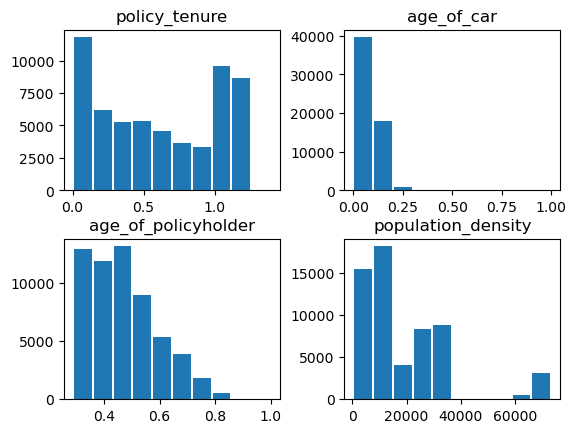

In [45]:
policy_features.hist(column=['policy_tenure','age_of_car','age_of_policyholder','population_density'],bins=10,rwidth=0.9,grid=False)

array([[<Axes: title={'center': 'make'}>,
        <Axes: title={'center': 'airbags'}>,
        <Axes: title={'center': 'displacement'}>],
       [<Axes: title={'center': 'cylinder'}>,
        <Axes: title={'center': 'gear_box'}>,
        <Axes: title={'center': 'turning_radius'}>],
       [<Axes: title={'center': 'length'}>,
        <Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'gross_weight'}>,
        <Axes: title={'center': 'ncap_rating'}>, <Axes: >]], dtype=object)

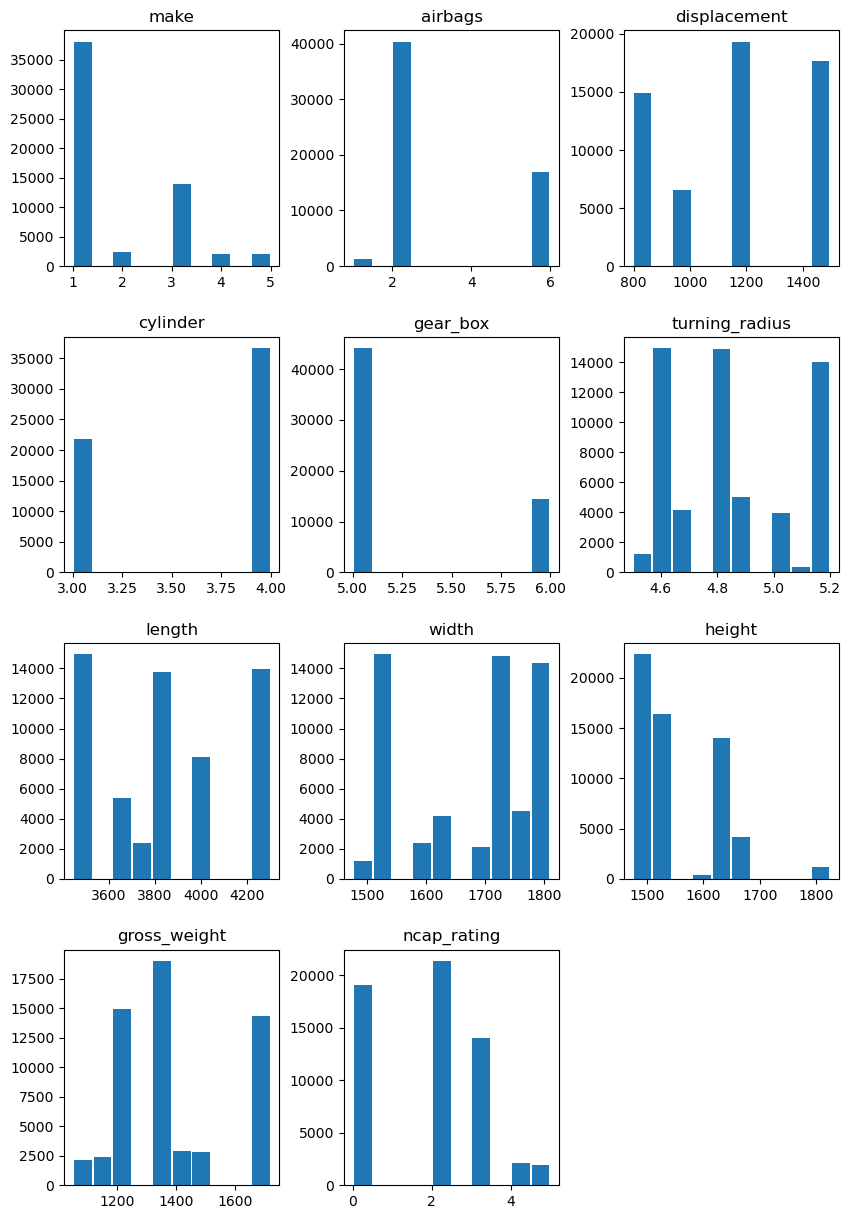

In [46]:
car_features.hist(column=['make', 'airbags', 'displacement', 'cylinder', 'gear_box', 'turning_radius', 'length', 'width',
                                 'height', 'gross_weight', 'ncap_rating'],figsize=(10,15),bins=10,rwidth=0.9,grid=False)

<h4>Merge is_claim (target variable) with features</h4>

In [16]:
car_features_merged=pd.merge(car_features,insurance_claim,on='policy_id',how='outer')
policy_features_merged=pd.merge(policy_features,insurance_claim,on='policy_id',how='outer')

In [17]:
car_features_merged.sample(10)

,policy_id,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
18455,ID18456,1,B1,M8,CNG,82.1Nm@3400rpm,55.92bhp@5300rpm,K10C,2.0,No,...,No,Yes,Yes,Yes,No,No,Yes,Yes,2,0
15432,ID15433,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2.0,No,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
31237,ID31238,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2.0,No,...,No,No,No,Yes,No,No,No,Yes,0,0
52456,ID52457,1,Utility,M10,CNG,85Nm@3000rpm,61.68bhp@6000rpm,G12B,1.0,No,...,No,No,No,No,No,No,No,Yes,0,0
13810,ID13811,1,B2,M7,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K Series Engine,6.0,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,0
51883,ID51884,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2.0,No,...,No,No,No,Yes,No,No,No,Yes,0,0
30095,ID30096,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6.0,Yes,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
47927,ID47928,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2.0,No,...,No,No,No,Yes,No,No,No,Yes,0,0
26362,ID26363,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2.0,No,...,No,No,No,Yes,No,No,No,Yes,0,0
22865,ID22866,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6.0,Yes,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0


In [18]:
policy_features_merged.sample(10)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,is_claim
14165,ID14166,0.326605,0.02,0.451923,C3,4076.0,0
54915,ID54916,0.470123,0.14,0.538462,C5,34738.0,0
58189,ID58190,0.353962,0.03,0.615385,C8,8794.0,0
16629,ID16630,0.063584,0.00,0.509615,C10,73430.0,0
30592,ID30593,0.714768,0.01,0.384615,C5,34738.0,0
48582,ID48583,0.572742,0.03,0.605769,C9,17804.0,0
39664,ID39665,1.078647,0.06,0.403846,C8,8794.0,0
24318,ID24319,0.355181,0.13,0.442308,C12,34791.0,0
21359,ID21360,0.959597,0.10,0.355769,C3,4076.0,0
6231,ID06232,1.069469,0.02,0.682692,C8,8794.0,0


In [49]:
for col in policy_features_merged:
    print(f'{col} : {policy_features_merged[col].nunique()}')

policy_id : 58515
policy_tenure : 58495
age_of_car : 49
age_of_policyholder : 75
area_cluster : 22
population_density : 22
is_claim : 2


In [51]:
policy_features_merged.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'is_claim'],
      dtype='object')

In [62]:
car_features_merged.columns

Index(['policy_id', 'make', 'segment', 'model', 'fuel_type', 'max_torque',
       'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim',
       'max_power_value', 'max_power_rpm', 'max_torque_value',
       'max_torque_rpm'],
      dtype='object')

<h4>Unique values for each feature</h4>

In [66]:
policy_features_categorical=policy_features_merged['area_cluster']
car_categorical_cols = [
    'make', 'segment', 'model', 'fuel_type', 'engine_type', 'airbags', 'is_esc',
    'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera',
    'rear_brakes_type', 'cylinder', 'transmission_type', 'gear_box', 'steering_type',
    'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
    'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking',
    'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
    'is_ecw', 'is_speed_alert', 'ncap_rating']
car_features_categorical=car_features_merged[car_categorical_cols]

In [59]:
for col in policy_features_categorical:
    print(f'{col} : {policy_features_categorical[col].unique()}')

area_cluster : ['C1' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'C10' nan 'C11' 'C12' 'C13'
 'C14' 'C15' 'C16' 'C17' 'C18' 'C19' 'C20' 'C21' 'C22']


In [47]:
for col in car_features_merged:
    print(f'{col} : {car_features_merged[col].nunique()}')

policy_id : 58515
make : 5
segment : 6
model : 11
fuel_type : 3
max_torque : 9
max_power : 9
engine_type : 11
airbags : 3
is_esc : 2
is_adjustable_steering : 2
is_tpms : 2
is_parking_sensors : 2
is_parking_camera : 2
rear_brakes_type : 2
displacement : 9
cylinder : 2
transmission_type : 2
gear_box : 2
steering_type : 3
turning_radius : 9
length : 9
width : 10
height : 11
gross_weight : 10
is_front_fog_lights : 2
is_rear_window_wiper : 2
is_rear_window_washer : 2
is_rear_window_defogger : 2
is_brake_assist : 2
is_power_door_locks : 2
is_central_locking : 2
is_power_steering : 2
is_driver_seat_height_adjustable : 2
is_day_night_rear_view_mirror : 2
is_ecw : 2
is_speed_alert : 2
ncap_rating : 5
is_claim : 2
max_power_value : 9
max_power_rpm : 5
max_torque_value : 8
max_torque_rpm : 8


In [67]:
for col in car_features_categorical:
    print(f'{col} : {car_features_categorical[col].unique()}')

make : [1 2 3 4 5]
segment : ['A' 'C1' 'C2' 'B2' 'B1' 'Utility']
model : ['M1' 'M2' 'M3' 'M4' 'M5' 'M6' 'M7' 'M8' 'M9' 'M10' 'M11']
fuel_type : ['CNG' 'Petrol' 'Diesel' nan]
engine_type : ['F8D Petrol Engine' '1.2 L K12N Dualjet' '1.0 SCe' '1.5 L U2 CRDi'
 '1.5 Turbocharged Revotorq' 'K Series Dual jet' '1.2 L K Series Engine'
 'K10C' 'i-DTEC' 'G12B' '1.5 Turbocharged Revotron' nan]
airbags : [ 2.  6.  1. nan]
is_esc : ['No' 'Yes' nan]
is_adjustable_steering : ['No' 'Yes' nan]
is_tpms : ['No' 'Yes' nan]
is_parking_sensors : ['Yes' 'No' nan]
is_parking_camera : ['No' 'Yes' nan]
rear_brakes_type : ['Drum' 'Disc']
cylinder : [ 3.  4. nan]
transmission_type : ['Manual' 'Automatic']
gear_box : [5 6]
steering_type : ['Power' 'Electric' 'Manual']
is_front_fog_lights : ['No' 'Yes']
is_rear_window_wiper : ['No' 'Yes']
is_rear_window_washer : ['No' 'Yes']
is_rear_window_defogger : ['No' 'Yes']
is_brake_assist : ['No' 'Yes']
is_power_door_locks : ['No' 'Yes']
is_central_locking : ['No' 'Yes']
is_

<h4>Is the dataset balanced? </h4>

is_claim
0    54772
1     3743
Name: count, dtype: int64
is_claim
0    0.936033
1    0.063967
Name: proportion, dtype: float64


<Axes: xlabel='is_claim', ylabel='count'>

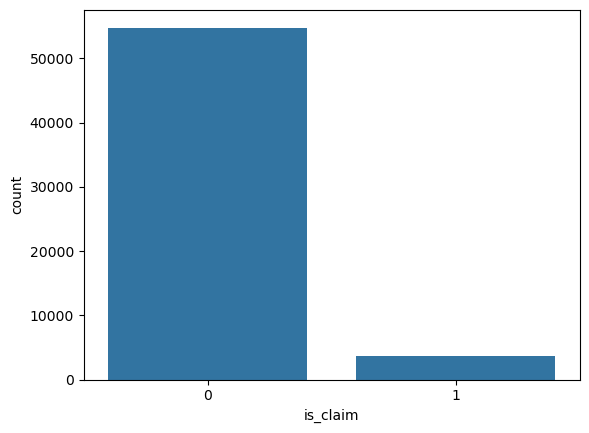

In [19]:
counts=insurance_claim['is_claim'].value_counts()
print(counts)
print(insurance_claim['is_claim'].value_counts(normalize=True))
sns.countplot(x='is_claim',data=insurance_claim)

<h3>No, dataset is not balanced</h3>

<h4>Separating 'Xbhp@Yrpm to different columns X and Y</h4>

In [20]:
car_features_merged['max_power_value']=car_features_merged['max_power'].str.split('bhp@').str[0].astype(float)
car_features_merged['max_power_rpm']=car_features_merged['max_power'].str.split('bhp@').str[1].str.replace("rpm","").astype(float)

<h4>Separating 'XNm@Yrpm to different columns X and Y</h4>

In [21]:
car_features_merged['max_torque_value']=car_features_merged['max_torque'].str.split('Nm@').str[0].astype(float)
car_features_merged['max_torque_rpm']=car_features_merged['max_torque'].str.split('Nm@').str[1].str.replace("rpm","").astype(float)

In [22]:
car_features_merged.sample(10)

,policy_id,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,...,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,max_power_value,max_power_rpm,max_torque_value,max_torque_rpm
30574,ID30575,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2.0,No,...,Yes,Yes,Yes,Yes,2,0,88.50,6000.0,113.0,4400.0
2139,ID02140,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6.0,Yes,...,Yes,No,Yes,Yes,3,0,113.45,4000.0,250.0,2750.0
42125,ID42126,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2.0,No,...,No,No,No,Yes,0,0,40.36,6000.0,60.0,3500.0
40016,ID40017,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2.0,No,...,No,No,No,Yes,0,0,40.36,6000.0,60.0,3500.0
39190,ID39191,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6.0,Yes,...,Yes,No,Yes,Yes,3,0,113.45,4000.0,250.0,2750.0
44868,ID44869,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2.0,No,...,Yes,Yes,Yes,Yes,2,0,88.50,6000.0,113.0,4400.0
33138,ID33139,5,C1,M9,Diesel,200Nm@1750rpm,97.89bhp@3600rpm,i-DTEC,2.0,No,...,Yes,Yes,Yes,Yes,4,1,97.89,3600.0,200.0,1750.0
4357,ID04358,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2.0,No,...,Yes,Yes,Yes,Yes,2,0,88.50,6000.0,113.0,4400.0
7904,ID07905,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6.0,Yes,...,Yes,No,Yes,Yes,3,0,113.45,4000.0,250.0,2750.0
15947,ID15948,4,C1,M11,Petrol,170Nm@4000rpm,118.36bhp@5500rpm,1.5 Turbocharged Revotron,2.0,Yes,...,Yes,No,Yes,No,5,0,118.36,5500.0,170.0,4000.0


<h4>Scaling Numerical Features</h4>

In [23]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer

policy_continuous = ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density']
car_continuous = ['max_torque_value', 'max_power_value', 'max_torque_rpm', 'max_power_rpm', 'displacement', 'cylinder', 'turning_radius',
    'length', 'width', 'height', 'gross_weight', 'ncap_rating', 'airbags', 'gear_box']

policy_features_merged_scaled = policy_features_merged.copy()
policy_features_merged_scaled[policy_continuous] = MinMaxScaler().fit_transform(policy_features_merged[policy_continuous])

car_features_merged_scaled = car_features_merged.copy()
car_features_merged_scaled[car_continuous] = MinMaxScaler().fit_transform(car_features_merged[car_continuous])

<h4>Dropping reduntant columns</h4>

In [24]:
car_features_merged_scaled = car_features_merged_scaled.drop(['max_power', 'max_torque'], axis=1)

In [25]:
car_features_merged_scaled.sample(10)

,policy_id,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,...,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,max_power_value,max_power_rpm,max_torque_value,max_torque_rpm
22553,ID22554,1,B2,M6,Petrol,K Series Dual jet,0.2,No,Yes,No,...,Yes,Yes,Yes,Yes,0.4,0,0.617179,1.000000,0.278947,1.000000
40226,ID40227,1,A,M1,CNG,F8D Petrol Engine,0.2,No,No,No,...,No,No,No,Yes,0.0,0,0.000000,1.000000,0.000000,0.660377
50669,ID50670,1,B1,M8,CNG,K10C,0.2,No,No,No,...,No,No,Yes,Yes,0.4,0,0.199487,0.708333,0.116316,0.622642
36519,ID36520,3,C2,M4,Diesel,1.5 L U2 CRDi,1.0,Yes,Yes,Yes,...,Yes,No,Yes,Yes,0.6,0,0.937051,0.166667,1.000000,0.377358
36590,ID36591,3,C2,M4,Diesel,1.5 L U2 CRDi,1.0,Yes,Yes,Yes,...,Yes,No,Yes,Yes,0.6,0,0.937051,0.166667,1.000000,0.377358
27155,ID27156,1,A,M1,CNG,F8D Petrol Engine,0.2,No,No,No,...,No,No,No,Yes,0.0,1,0.000000,1.000000,0.000000,0.660377
18997,ID18998,3,C2,M4,Diesel,1.5 L U2 CRDi,1.0,Yes,Yes,Yes,...,Yes,No,Yes,Yes,0.6,0,0.937051,0.166667,1.000000,0.377358
45176,ID45177,1,A,M1,CNG,F8D Petrol Engine,0.2,No,No,No,...,No,No,No,Yes,0.0,0,0.000000,1.000000,0.000000,0.660377
13836,ID13837,1,B1,M8,CNG,K10C,0.2,No,No,No,...,No,No,Yes,Yes,0.4,0,0.199487,0.708333,0.116316,0.622642
32001,ID32002,1,A,M1,CNG,F8D Petrol Engine,0.2,No,No,No,...,No,No,No,Yes,0.0,0,0.000000,1.000000,0.000000,0.660377


In [27]:
policy_features_merged_scaled.sample(10)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,is_claim
39736,ID39737,0.534043,0.02,0.256757,C2,0.365231,0
35262,ID35263,0.156747,0.01,0.378378,C3,0.051764,0
38010,ID38011,0.655599,0.12,0.148649,C2,0.365231,0
14418,ID14419,0.232845,0.14,0.175676,C15,0.000000,0
47887,ID47888,0.805730,0.10,0.594595,C8,0.116270,0
21668,ID21669,0.769006,0.16,0.432432,C14,0.102516,0
58031,ID58032,0.763234,0.07,0.229730,C7,0.079601,0
8226,ID08227,0.453692,0.00,0.527027,C9,0.239459,0
16166,ID16167,0.533799,0.02,0.716216,C8,0.116270,0
1324,ID01325,0.342938,0.12,0.175676,C8,0.116270,0


<h4>Correlation Matrix of policy_features</h4>

<Axes: >

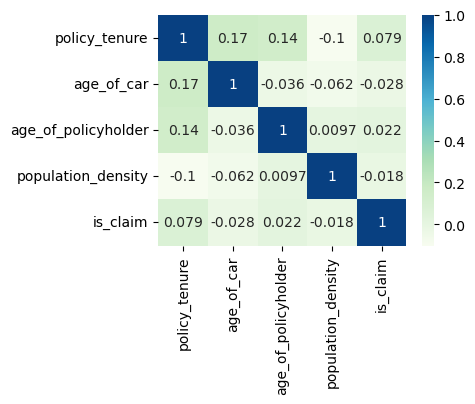

In [26]:
continuous_features = [
    'policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'is_claim'
]

plt.figure(figsize=(4,3))
corr_mat = policy_features_merged_scaled[continuous_features].corr()
sns.heatmap(corr_mat,annot=True,cmap='GnBu')

<h4>Correlation Matrix for Car_features</h4>

<Axes: >

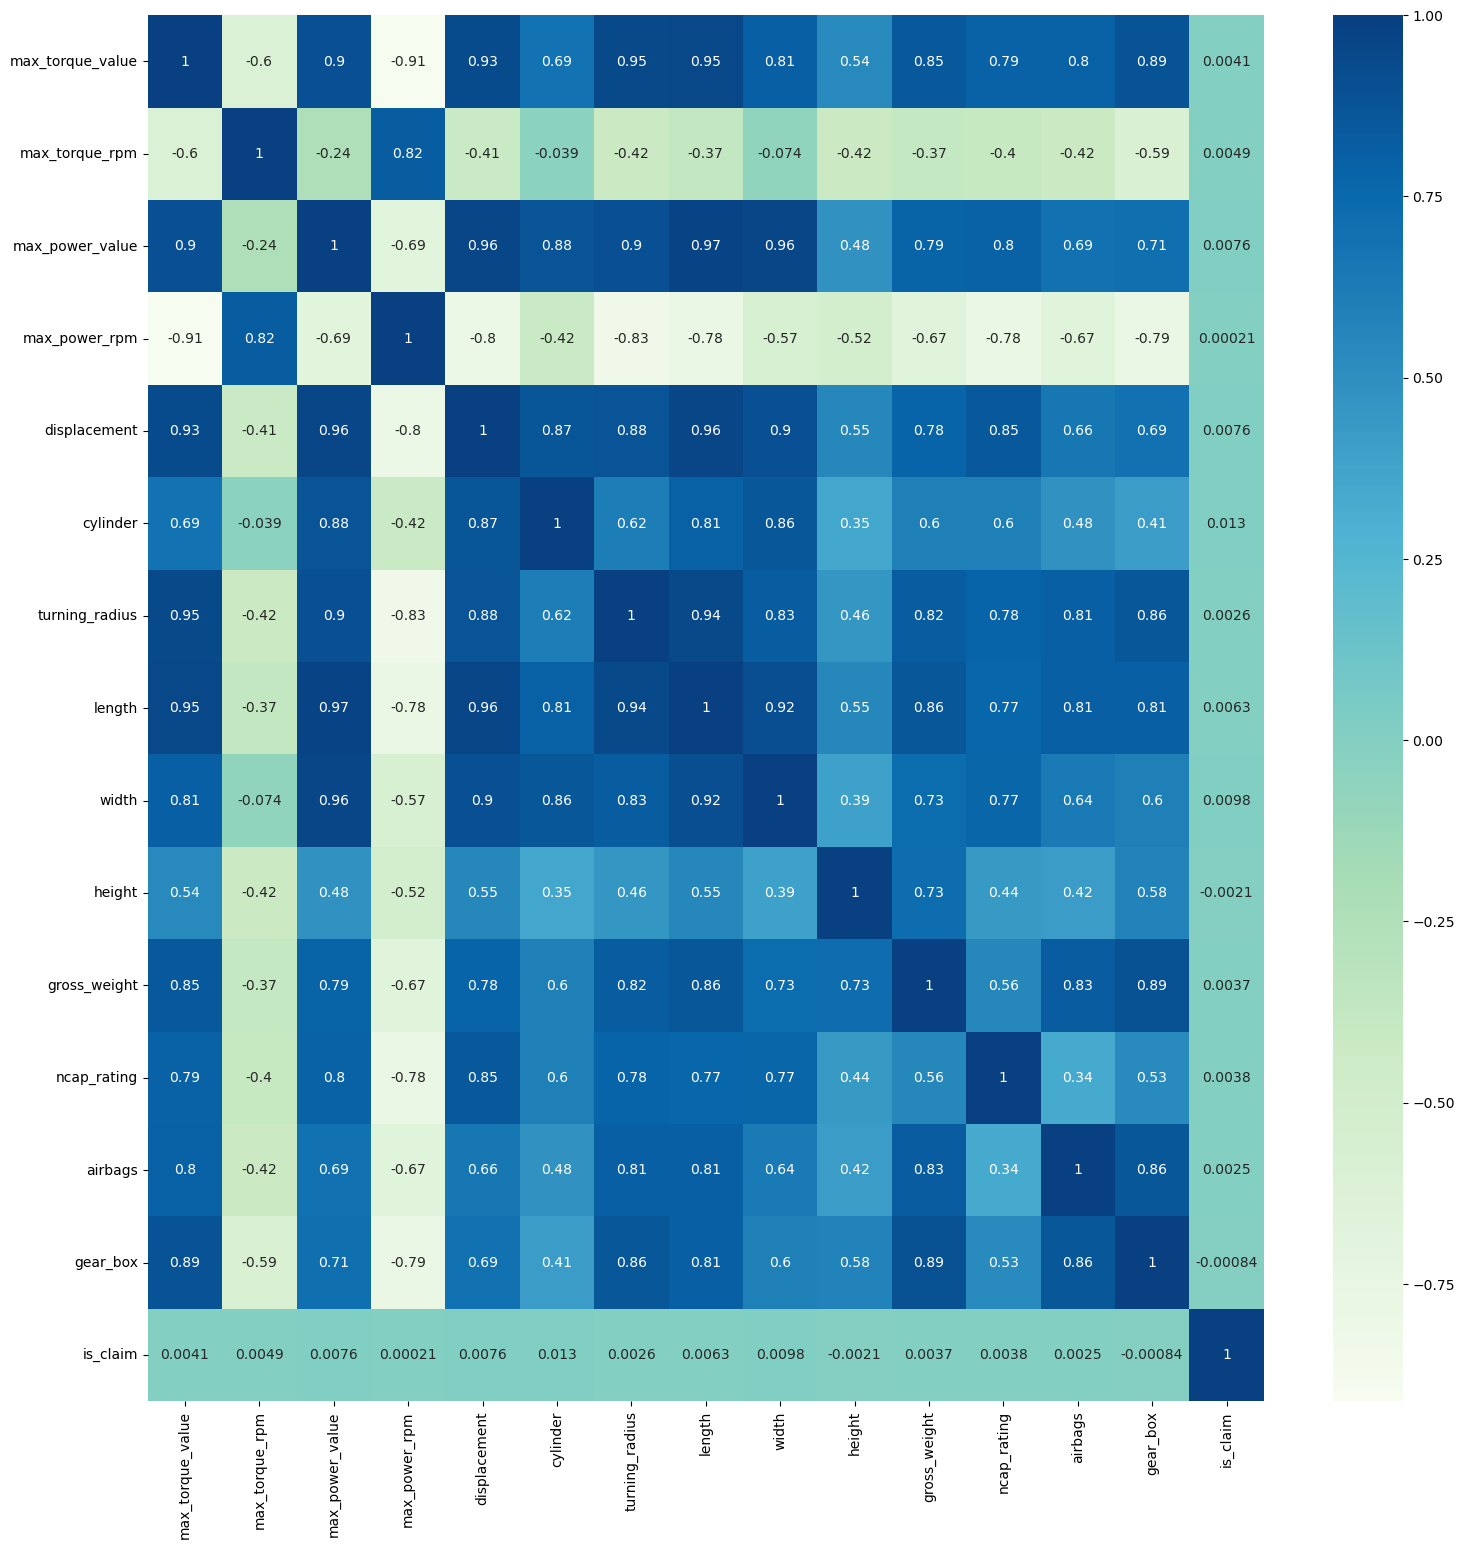

In [29]:
continuous_features = [
    'max_torque_value', 'max_torque_rpm', 'max_power_value', 'max_power_rpm',
    'displacement', 'cylinder', 'turning_radius', 'length', 'width', 'height',
    'gross_weight', 'ncap_rating', 'airbags', 'gear_box', 'is_claim'
]

plt.figure(figsize=(18,18))
corr_mat = car_features_merged_scaled[continuous_features].corr()
sns.heatmap(corr_mat,annot=True,cmap='GnBu')

<h4>Chi-square test of independence for policy_features</h4>

In [27]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(policy_features_merged_scaled['area_cluster'], policy_features_merged_scaled['is_claim'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"area_cluster: chi2={chi2:.2f}, p-value={p:.4f}")

area_cluster: chi2=96.14, p-value=0.0000


<h4>Chi-square test of independence for car_features</h4>

In [28]:
categorical_features = [
    'segment', 'model', 'fuel_type','engine_type', 
    'rear_brakes_type', 'transmission_type', 'steering_type'
]
boolean_features = [col for col in car_features_merged_scaled.columns if (col.startswith('is_') and col!='is_claim')]

cat_bool_features = categorical_features + boolean_features

for col in cat_bool_features:
    contingency_table = pd.crosstab(car_features_merged_scaled[col], car_features_merged_scaled['is_claim'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{col}: chi2={chi2:.2f}, p-value={p:.4f}")

segment: chi2=12.53, p-value=0.0282
model: chi2=19.83, p-value=0.0309
fuel_type: chi2=5.76, p-value=0.0562
engine_type: chi2=20.15, p-value=0.0279
rear_brakes_type: chi2=0.01, p-value=0.9197
transmission_type: chi2=0.01, p-value=0.9293
steering_type: chi2=5.90, p-value=0.0525
is_esc: chi2=0.42, p-value=0.5150
is_adjustable_steering: chi2=11.21, p-value=0.0008
is_tpms: chi2=0.01, p-value=0.9136
is_parking_sensors: chi2=4.15, p-value=0.0415
is_parking_camera: chi2=0.07, p-value=0.7985
is_front_fog_lights: chi2=7.96, p-value=0.0048
is_rear_window_wiper: chi2=0.31, p-value=0.5796
is_rear_window_washer: chi2=0.31, p-value=0.5796
is_rear_window_defogger: chi2=0.31, p-value=0.5807
is_brake_assist: chi2=6.70, p-value=0.0096
is_power_door_locks: chi2=2.53, p-value=0.1120
is_central_locking: chi2=2.53, p-value=0.1120
is_power_steering: chi2=0.20, p-value=0.6541
is_driver_seat_height_adjustable: chi2=6.48, p-value=0.0109
is_day_night_rear_view_mirror: chi2=3.81, p-value=0.0511
is_ecw: chi2=2.53, 

<h4>One Hot Encoding of Categorical features</h4>

In [29]:
car_categorical_features = [
    'segment', 'model', 'fuel_type', 'engine_type',
    'rear_brakes_type', 'transmission_type', 'steering_type'
]
policy_categorical_features = ['area_cluster']

policy_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
policy_encoded = policy_encoder.fit_transform(policy_features_merged_scaled[policy_categorical_features])
policy_encoded_df = pd.DataFrame(
    policy_encoded,
    columns=policy_encoder.get_feature_names_out(policy_categorical_features),
    index=policy_features_merged_scaled.index
)
policy_features_merged_scaled = pd.concat(
    [policy_features_merged_scaled.drop(columns=policy_categorical_features), policy_encoded_df],
    axis=1
)

car_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
car_encoded = car_encoder.fit_transform(car_features_merged_scaled[car_categorical_features])
car_encoded_df = pd.DataFrame(
    car_encoded,
    columns=car_encoder.get_feature_names_out(car_categorical_features),
    index=car_features_merged_scaled.index
)
car_features_merged_scaled = pd.concat(
    [car_features_merged_scaled.drop(columns=car_categorical_features), car_encoded_df],
    axis=1
)

boolean_features = [
    col for col in car_features_merged_scaled.columns
    if col.startswith('is_') and col != 'is_claim'
]
car_features_merged_scaled[boolean_features] = car_features_merged_scaled[boolean_features].apply(
    lambda x: x.map({'Yes': 1, 'No': 0})
)

In [30]:
policy_features_merged_scaled.sample(10)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,population_density,is_claim,area_cluster_C1,area_cluster_C10,area_cluster_C11,area_cluster_C12,...,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9,area_cluster_nan
49189,ID49190,0.029855,0.07,0.067568,0.471712,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22235,ID22236,0.784507,0.09,0.148649,0.116270,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12066,ID12067,0.549169,0.01,0.324324,0.470987,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50309,ID50310,0.594450,0.02,0.310811,0.051764,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45712,ID45713,0.456697,0.07,0.000000,0.470987,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4529,ID04530,0.293898,0.04,0.405405,0.471712,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4352,ID04353,0.067637,0.03,0.108108,0.070003,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29649,ID29650,0.087247,0.05,0.662162,0.470987,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
18914,ID18915,0.780018,0.13,0.351351,0.116270,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6620,ID06621,0.579251,0.04,0.662162,0.470987,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [31]:
policy_features_merged_scaled.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'is_claim', 'area_cluster_C1', 'area_cluster_C10',
       'area_cluster_C11', 'area_cluster_C12', 'area_cluster_C13',
       'area_cluster_C14', 'area_cluster_C15', 'area_cluster_C16',
       'area_cluster_C17', 'area_cluster_C18', 'area_cluster_C19',
       'area_cluster_C2', 'area_cluster_C20', 'area_cluster_C21',
       'area_cluster_C22', 'area_cluster_C3', 'area_cluster_C4',
       'area_cluster_C5', 'area_cluster_C6', 'area_cluster_C7',
       'area_cluster_C8', 'area_cluster_C9', 'area_cluster_nan'],
      dtype='object')

In [32]:
car_features_merged_scaled.sample(10)

,policy_id,make,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,displacement,cylinder,...,engine_type_K10C,engine_type_i-DTEC,engine_type_nan,rear_brakes_type_Disc,rear_brakes_type_Drum,transmission_type_Automatic,transmission_type_Manual,steering_type_Electric,steering_type_Manual,steering_type_Power
6733,ID06734,1,0.2,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
12189,ID12190,1,1.0,1.0,1.0,0.0,1.0,1.0,0.571225,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
8423,ID08424,1,0.2,1.0,1.0,0.0,1.0,1.0,0.571225,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3627,ID03628,3,1.0,1.0,1.0,1.0,1.0,1.0,0.992877,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
31179,ID31180,1,0.2,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
23296,ID23297,3,1.0,1.0,1.0,1.0,1.0,1.0,0.992877,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1954,ID01955,3,1.0,1.0,1.0,1.0,1.0,1.0,0.992877,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
46789,ID46790,3,1.0,1.0,1.0,1.0,1.0,1.0,0.992877,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
991,ID00992,3,1.0,1.0,1.0,1.0,1.0,1.0,0.992877,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
36772,ID36773,3,1.0,1.0,1.0,1.0,1.0,1.0,0.992877,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [33]:
df = policy_features_merged_scaled.merge(car_features_merged_scaled, on=['policy_id', 'is_claim'])

In [34]:
df.sample(10)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,population_density,is_claim,area_cluster_C1,area_cluster_C10,area_cluster_C11,area_cluster_C12,...,engine_type_K10C,engine_type_i-DTEC,engine_type_nan,rear_brakes_type_Disc,rear_brakes_type_Drum,transmission_type_Automatic,transmission_type_Manual,steering_type_Electric,steering_type_Manual,steering_type_Power
45649,ID45650,0.784080,0.01,0.283784,0.365231,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
54176,ID54177,0.797944,0.02,0.256757,0.116270,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5603,ID05604,0.086903,0.11,0.081081,0.102516,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
25772,ID25773,0.478926,0.00,0.162162,1.000000,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
22163,ID22164,0.894063,0.10,0.202703,0.070003,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
6358,ID06359,0.500698,0.02,0.527027,0.079601,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7421,ID07422,0.251201,0.00,0.175676,1.000000,0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
41023,ID41024,0.832706,0.07,0.027027,0.471712,0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
42904,ID42905,0.776187,0.13,0.202703,0.102516,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
31094,ID31095,0.797911,0.06,0.554054,1.000000,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


<Axes: >

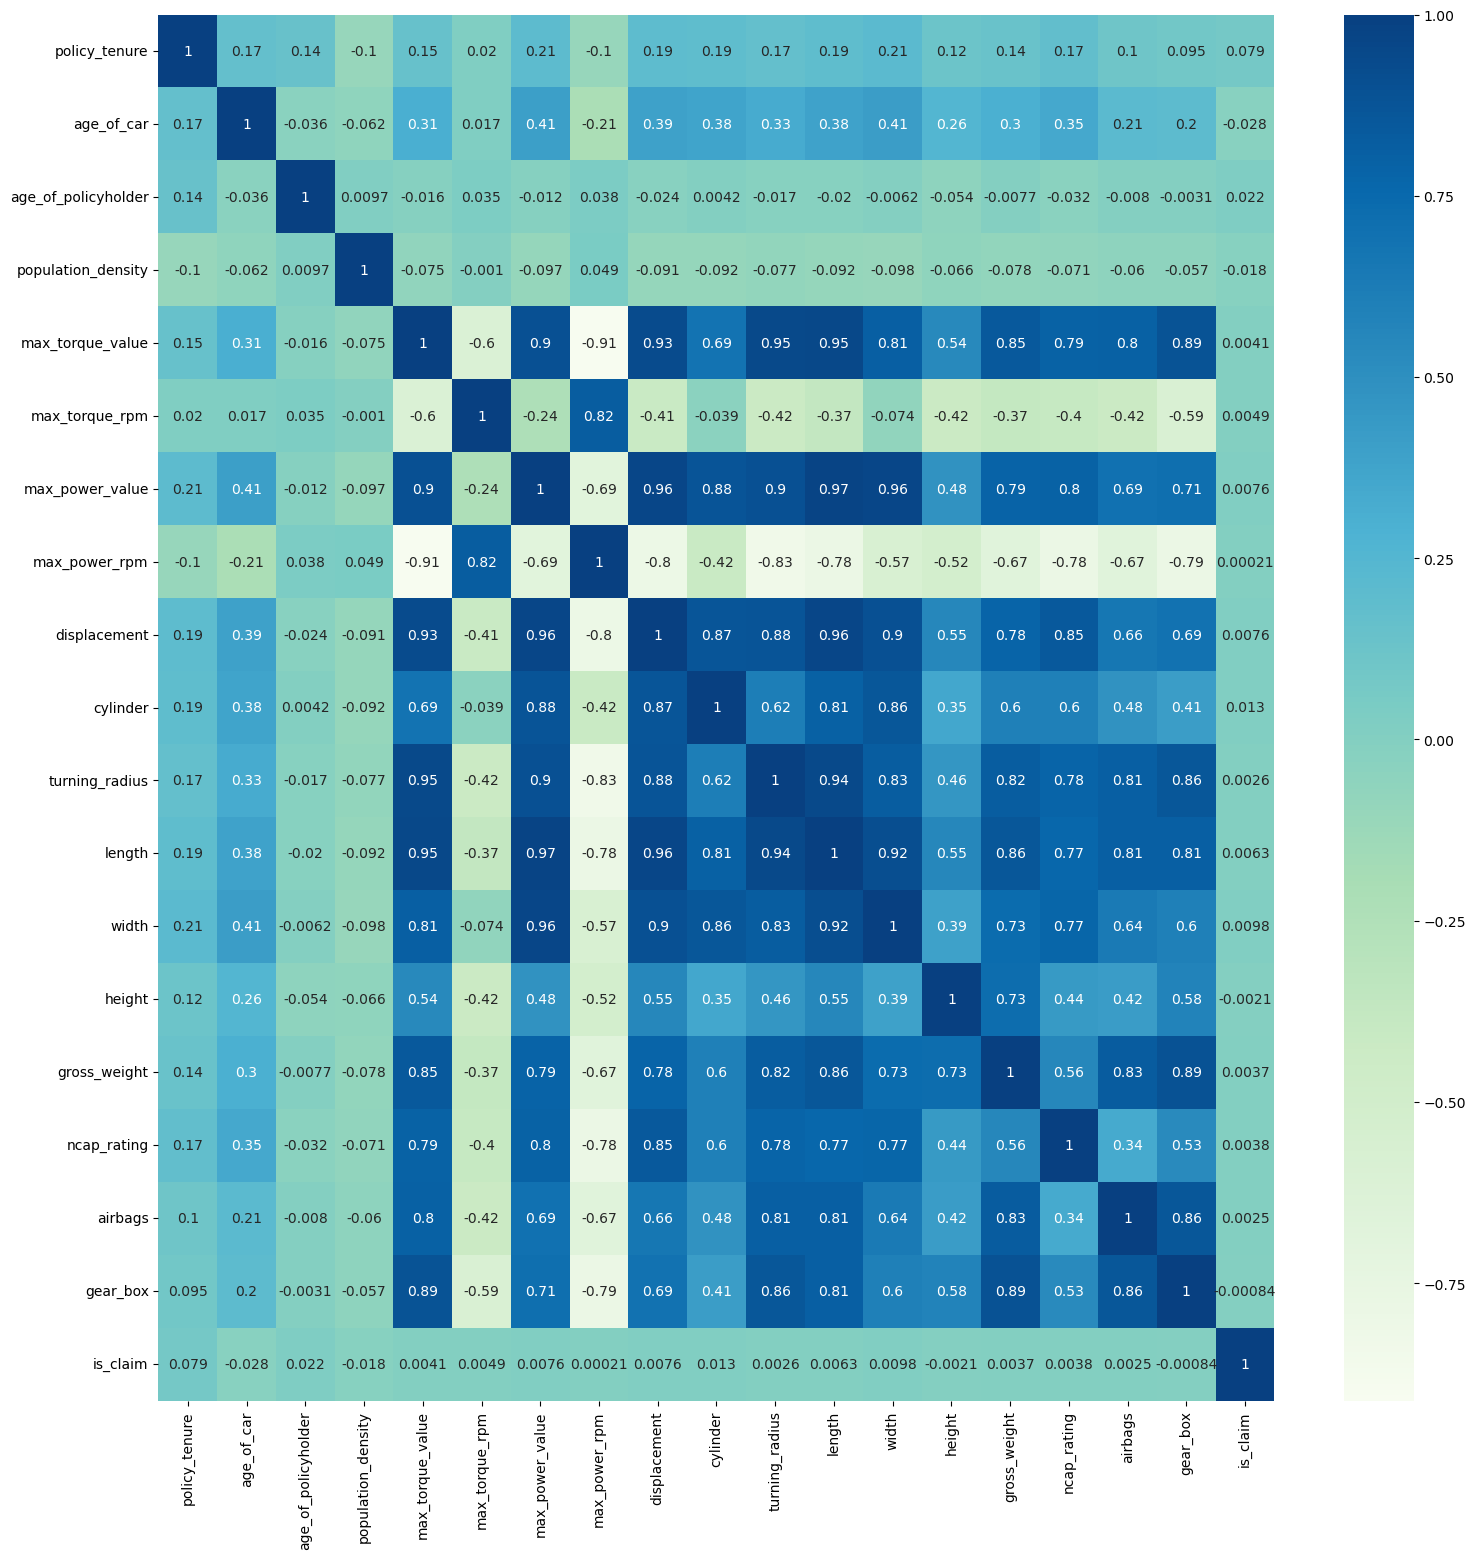

In [35]:
continuous_features = [
    'policy_tenure', 'age_of_car', 'age_of_policyholder','population_density','max_torque_value', 'max_torque_rpm', 'max_power_value', 'max_power_rpm',
    'displacement', 'cylinder', 'turning_radius', 'length', 'width', 'height',
    'gross_weight','ncap_rating', 'airbags', 'gear_box', 'is_claim'
]

plt.figure(figsize=(18,18))
corr_mat = df[continuous_features].corr()
sns.heatmap(corr_mat,annot=True,cmap='GnBu')

In [36]:
df.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'is_claim', 'area_cluster_C1', 'area_cluster_C10',
       'area_cluster_C11', 'area_cluster_C12',
       ...
       'engine_type_K10C', 'engine_type_i-DTEC', 'engine_type_nan',
       'rear_brakes_type_Disc', 'rear_brakes_type_Drum',
       'transmission_type_Automatic', 'transmission_type_Manual',
       'steering_type_Electric', 'steering_type_Manual',
       'steering_type_Power'],
      dtype='object', length=101)

In [37]:
df_prev = policy_features_merged.merge(car_features_merged, on=['policy_id', 'is_claim'])

In [38]:
df_prev.sample(10)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,is_claim,make,segment,model,...,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,max_power_value,max_power_rpm,max_torque_value,max_torque_rpm
49555,ID49556,0.982916,0.01,0.432692,C3,4076.0,0,1,A,M1,...,Yes,No,No,No,Yes,0,40.36,6000.0,60.0,3500.0
4664,ID04665,0.140097,0.15,0.288462,C7,6112.0,0,1,B2,M7,...,Yes,Yes,Yes,Yes,Yes,0,88.50,6000.0,113.0,4400.0
16700,ID16701,1.173374,0.11,0.692308,C5,34738.0,0,1,B2,M7,...,Yes,Yes,Yes,Yes,Yes,0,88.50,6000.0,113.0,4400.0
44746,ID44747,0.663994,0.10,0.394231,C2,27003.0,0,1,C1,M2,...,Yes,Yes,Yes,Yes,Yes,2,88.50,6000.0,113.0,4400.0
26616,ID26617,0.428242,0.15,0.394231,C14,7788.0,0,3,C2,M4,...,Yes,Yes,No,Yes,Yes,3,113.45,4000.0,250.0,2750.0
48301,ID48302,0.287602,0.04,0.307692,C5,34738.0,0,1,A,M1,...,Yes,No,No,No,Yes,0,40.36,6000.0,60.0,3500.0
11785,ID11786,1.023302,0.12,0.413462,C8,8794.0,0,2,A,M3,...,Yes,No,Yes,Yes,Yes,2,67.06,5500.0,91.0,4250.0
49596,ID49597,1.136191,0.12,0.701923,C14,7788.0,0,3,C2,M4,...,Yes,Yes,No,Yes,Yes,3,113.45,4000.0,250.0,2750.0
29575,ID29576,0.006820,0.02,0.365385,C3,4076.0,0,1,B2,M6,...,Yes,Yes,Yes,Yes,Yes,2,88.50,6000.0,113.0,4400.0
30081,ID30082,0.449096,0.02,0.413462,C2,27003.0,0,1,A,M1,...,Yes,No,No,No,Yes,0,40.36,6000.0,60.0,3500.0


In [39]:
categorical_features_total= ['area_cluster', 'segment', 'model', 'fuel_type','engine_type', 'rear_brakes_type', 'transmission_type', 'steering_type']
boolean_features_total = [col for col in df_prev.columns if (col.startswith('is_') and col!='is_claim')]

cat_bool_features = categorical_features_total + boolean_features_total

for col in cat_bool_features:
    contingency_table = pd.crosstab(df_prev[col], df_prev['is_claim'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{col}: chi2={chi2:.2f}, p-value={p:.4f}")         #p-val<0.05


# area_cluster (p=0.0000)
# segment (p=0.0282)
# model (p=0.0309)
# engine_type (p=0.0279)
# is_adjustable_steering (p=0.0008)
# is_parking_sensors (p=0.0415)
# is_front_fog_lights (p=0.0048)
# is_brake_assist (p=0.0096)
# is_driver_seat_height_adjustable (p=0.0109)

area_cluster: chi2=96.14, p-value=0.0000
segment: chi2=12.53, p-value=0.0282
model: chi2=19.83, p-value=0.0309
fuel_type: chi2=5.76, p-value=0.0562
engine_type: chi2=20.15, p-value=0.0279
rear_brakes_type: chi2=0.01, p-value=0.9197
transmission_type: chi2=0.01, p-value=0.9293
steering_type: chi2=5.90, p-value=0.0525
is_esc: chi2=0.42, p-value=0.5150
is_adjustable_steering: chi2=11.21, p-value=0.0008
is_tpms: chi2=0.01, p-value=0.9136
is_parking_sensors: chi2=4.15, p-value=0.0415
is_parking_camera: chi2=0.07, p-value=0.7985
is_front_fog_lights: chi2=7.96, p-value=0.0048
is_rear_window_wiper: chi2=0.31, p-value=0.5796
is_rear_window_washer: chi2=0.31, p-value=0.5796
is_rear_window_defogger: chi2=0.31, p-value=0.5807
is_brake_assist: chi2=6.70, p-value=0.0096
is_power_door_locks: chi2=2.53, p-value=0.1120
is_central_locking: chi2=2.53, p-value=0.1120
is_power_steering: chi2=0.20, p-value=0.6541
is_driver_seat_height_adjustable: chi2=6.48, p-value=0.0109
is_day_night_rear_view_mirror: chi2

In [40]:
categorical_features = [
    'segment', 'model', 'fuel_type',
    'engine_type', 'rear_brakes_type', 'transmission_type', 'steering_type'
]
boolean_features = [col for col in car_features.columns if (col.startswith('is_') and col!='is_claim')]

cat_bool_features = categorical_features + boolean_features

for col in cat_bool_features:
    contingency_table = pd.crosstab(car_features[col], car_features['model'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{col}: chi2={chi2:.2f}, p-value={p:.4f}")

segment: chi2=292575.00, p-value=0.0000
model: chi2=585150.00, p-value=0.0000
fuel_type: chi2=116978.00, p-value=0.0000
engine_type: chi2=585120.00, p-value=0.0000
rear_brakes_type: chi2=58515.00, p-value=0.0000
transmission_type: chi2=58515.00, p-value=0.0000
steering_type: chi2=117030.00, p-value=0.0000
is_esc: chi2=58512.00, p-value=0.0000
is_adjustable_steering: chi2=58508.00, p-value=0.0000
is_tpms: chi2=58512.00, p-value=0.0000
is_parking_sensors: chi2=58508.00, p-value=0.0000
is_parking_camera: chi2=58512.00, p-value=0.0000
is_front_fog_lights: chi2=58515.00, p-value=0.0000
is_rear_window_wiper: chi2=58515.00, p-value=0.0000
is_rear_window_washer: chi2=58515.00, p-value=0.0000
is_rear_window_defogger: chi2=58515.00, p-value=0.0000
is_brake_assist: chi2=58515.00, p-value=0.0000
is_power_door_locks: chi2=58515.00, p-value=0.0000
is_central_locking: chi2=58515.00, p-value=0.0000
is_power_steering: chi2=58515.00, p-value=0.0000
is_driver_seat_height_adjustable: chi2=58515.00, p-valu

In [41]:
car_features['model'].unique()

array(['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11'],
      dtype=object)

In [42]:
categorical_features = [
    'area_cluster', 'population_density'
]
# boolean_features = [col for col in car_features.columns if (col.startswith('is_') and col!='is_claim')]

cat_bool_features = categorical_features #+ boolean_features

for col in cat_bool_features:
    contingency_table = pd.crosstab(policy_features[col], policy_features['area_cluster'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{col}: chi2={chi2:.2f}, p-value={p:.4f}")

area_cluster: chi2=1228689.00, p-value=0.0000
population_density: chi2=1228479.00, p-value=0.0000
